1. Determine: the features, the target, and the classes of this problem?

Features are:
  Outlook,
  Temperature,
  Humidity,
  Wind

Target:
  PlayTennis

Classes:
  Yes,
  No

In [195]:
import pandas as pd
#2. Use Pandas data frame to represent the dataset
# Define the dataset
data = {
    'Day': ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14'],
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

# Create a Pandas DataFrame
df = pd.DataFrame(data)
print(df)


    Day   Outlook Temperature Humidity    Wind PlayTennis
0    D1     Sunny         Hot     High    Weak         No
1    D2     Sunny         Hot     High  Strong         No
2    D3  Overcast         Hot     High    Weak        Yes
3    D4      Rain        Mild     High    Weak        Yes
4    D5      Rain        Cool   Normal    Weak        Yes
5    D6      Rain        Cool   Normal  Strong         No
6    D7  Overcast        Cool   Normal  Strong        Yes
7    D8     Sunny        Mild     High    Weak         No
8    D9     Sunny        Cool   Normal    Weak        Yes
9   D10      Rain        Mild   Normal    Weak        Yes
10  D11     Sunny        Mild   Normal  Strong        Yes
11  D12  Overcast        Mild     High  Strong        Yes
12  D13  Overcast         Hot   Normal    Weak        Yes
13  D14      Rain        Mild     High  Strong         No


In [196]:
#3. Train a Bayesian classifier algorithm on the provided training data, to return an answer to the
#  following input vector (outlook = sunny, temperature = cool, humidity = high, wind = strong)
#  write the program from scratches do not use scikit learn or any ML library
#  Note calculate all the probabilities automatically in the program

# Calculates prior probabilities
def calculate_prior_probabilities(data, target_column):
    total_samples = len(data)
    class_counts = data[target_column].value_counts()
    prior_probabilities = {label: count / total_samples for label, count in class_counts.items()}
    print("\nPrior probabilities:", prior_probabilities)
    return prior_probabilities

# Calculates likelihood probabilities
def calculate_likelihood_probabilities(data, feature_column, target_column):
    likelihood_probabilities = {}
    for label in data[target_column].unique():
        subset = data[data[target_column] == label]
        total_count = len(subset)
        feature_counts = subset[feature_column].value_counts()
        likelihood_probabilities[label] = {
            value: (count + 1) / (total_count + len(feature_counts))
            for value, count in feature_counts.items()
        }
    return likelihood_probabilities

# Makes predictions using Naive Bayes
def make_predictions(input_vector, prior_probabilities, likelihood_probabilities):
    class_probabilities = {}
    for label, prior in prior_probabilities.items():
        class_probabilities[label] = prior
        for feature, value in input_vector.items():
            likelihood_value = likelihood_probabilities[feature].get(value, 1e-5)
            class_probabilities[label] *= likelihood_value
    return class_probabilities

# Defines features and target
feature_columns = ['Outlook', 'Temperature', 'Humidity', 'Wind']
target_column = 'PlayTennis'

# Calculate prior and likelihoods using the defined functions
prior_probabilities = calculate_prior_probabilities(df, target_column)
likelihood_probabilities = {feature: calculate_likelihood_probabilities(df, feature, target_column) for feature in feature_columns}

# Input vector for prediction
input_vector = {
    'Outlook': 'Sunny',
    'Temperature': 'Cool',
    'Humidity': 'High',
    'Wind': 'Strong'
}

# Make the prediction
class_probabilities = make_predictions(input_vector, prior_probabilities, likelihood_probabilities)
print("\nProbabilities for each class:", class_probabilities)

# Determine predicted class
predicted_class = max(class_probabilities, key=class_probabilities.get)
print("Predicted outcome using manual Naive Bayes:", predicted_class)

# Display likelihoods for each feature given each class
for feature in feature_columns:
    print(f"\nLikelihood of {feature} given 'Yes' and 'No':")
    print("Given 'Yes':")
    print(df[df[target_column] == 'Yes'][feature].value_counts(normalize=True))
    print("Given 'No':")
    print(df[df[target_column] == 'No'][feature].value_counts(normalize=True))




Prior probabilities: {'Yes': 0.6428571428571429, 'No': 0.35714285714285715}

Probabilities for each class: {'Yes': 6.428571428571431e-21, 'No': 3.571428571428573e-21}
Predicted outcome using manual Naive Bayes: Yes

Likelihood of Outlook given 'Yes' and 'No':
Given 'Yes':
Outlook
Overcast    0.444444
Rain        0.333333
Sunny       0.222222
Name: proportion, dtype: float64
Given 'No':
Outlook
Sunny    0.6
Rain     0.4
Name: proportion, dtype: float64

Likelihood of Temperature given 'Yes' and 'No':
Given 'Yes':
Temperature
Mild    0.444444
Cool    0.333333
Hot     0.222222
Name: proportion, dtype: float64
Given 'No':
Temperature
Hot     0.4
Mild    0.4
Cool    0.2
Name: proportion, dtype: float64

Likelihood of Humidity given 'Yes' and 'No':
Given 'Yes':
Humidity
Normal    0.666667
High      0.333333
Name: proportion, dtype: float64
Given 'No':
Humidity
High      0.8
Normal    0.2
Name: proportion, dtype: float64

Likelihood of Wind given 'Yes' and 'No':
Given 'Yes':
Wind
Weak      0

In [197]:
#4. Train a Bayesian classifier algorithm on the provided training data, to return an answer to the
#    following input vector (outlook = sunny, temperature = cool, humidity = high, wind = strong) use
#    scikit learn GuassianNB

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd



# Prepare the data: Encode categorical variables and split into train and test sets
X = df[['Outlook', 'Temperature', 'Humidity', 'Wind']]
y = df['PlayTennis']

# Encode categorical variables
le_outlook = LabelEncoder()
le_temperature = LabelEncoder()
le_humidity = LabelEncoder()
le_wind = LabelEncoder()
le_play_tennis = LabelEncoder()

X_encoded = X.copy()
X_encoded['Outlook'] = le_outlook.fit_transform(X['Outlook'])
X_encoded['Temperature'] = le_temperature.fit_transform(X['Temperature'])
X_encoded['Humidity'] = le_humidity.fit_transform(X['Humidity'])
X_encoded['Wind'] = le_wind.fit_transform(X['Wind'])
y_encoded = le_play_tennis.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.09, random_state=42, stratify=y_encoded)

# Train the Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print("Classification Report: ")
print(classification_report(y_test, y_pred, target_names=le_play_tennis.classes_))

# Prepare the input vector for prediction
input_vector = ['Sunny', 'Cool', 'High', 'Strong']
input_vector_encoded = pd.DataFrame({
    'Outlook': le_outlook.transform([input_vector[0]]),
    'Temperature': le_temperature.transform([input_vector[1]]),
    'Humidity': le_humidity.transform([input_vector[2]]),
    'Wind': le_wind.transform([input_vector[3]])
})

# Get the probabilities for each class
probabilities = model.predict_proba(input_vector_encoded)

# Print probabilities with class labels
for idx, prob in enumerate(probabilities[0]):
    label = le_play_tennis.inverse_transform([idx])[0]  # Get the original class label
    print(f"Probability of {label}: {prob:.2f}")

# Make the prediction
predicted = model.predict(input_vector_encoded)
predicted_label = le_play_tennis.inverse_transform(predicted)
print("Predicted outcome for input vector using GaussianNB:", predicted_label[0])


Accuracy: 1.00
Classification Report: 
              precision    recall  f1-score   support

          No       1.00      1.00      1.00         1
         Yes       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Probability of No: 0.94
Probability of Yes: 0.06
Predicted outcome for input vector using GaussianNB: No


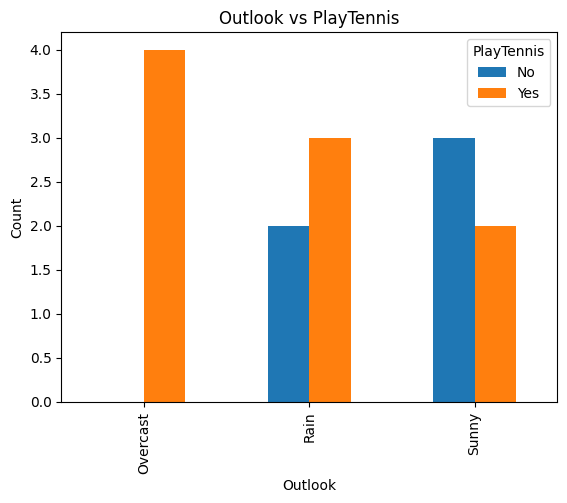

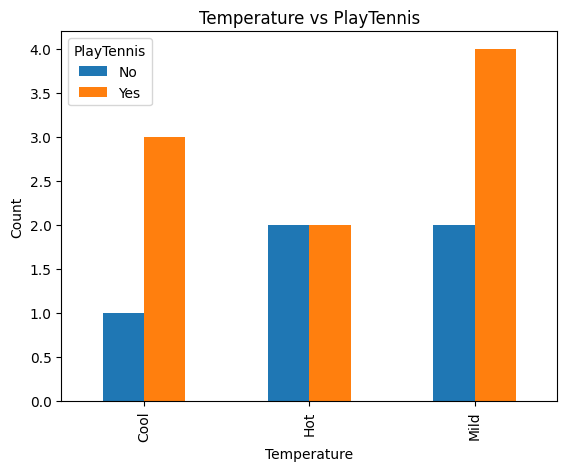

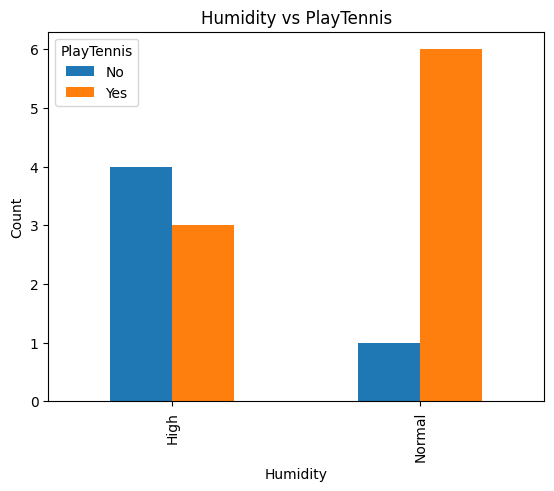

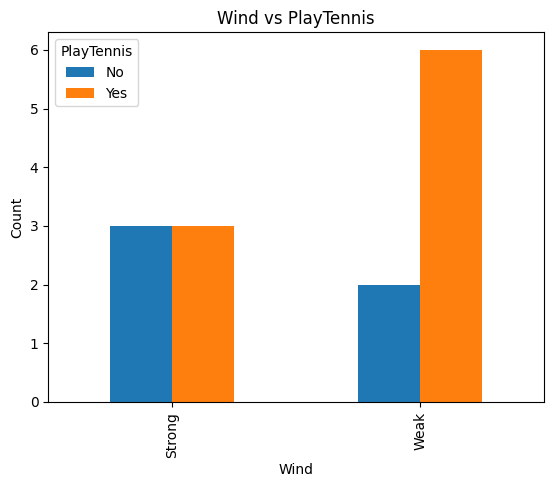

In [198]:
#5. Use matplotlib bar chart to show every feature with regards to the classes
import matplotlib.pyplot as plt

# Plot bar chart for each feature in relation to the classes
features = ['Outlook', 'Temperature', 'Humidity', 'Wind']
for feature in features:
    df.groupby([feature, 'PlayTennis']).size().unstack().plot(kind='bar', stacked=False)
    plt.title(f'{feature} vs PlayTennis')
    plt.ylabel('Count')
    plt.show()